In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

In [5]:
# Generate synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear SVM with linear kernel

In [8]:
# Linear SVM Kernel
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Linear SVM Accuracy:", linear_accuracy)

Linear SVM Accuracy: 0.9166666666666666


In [9]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, linear_predictions)
cm

array([[27,  3],
       [ 2, 28]])

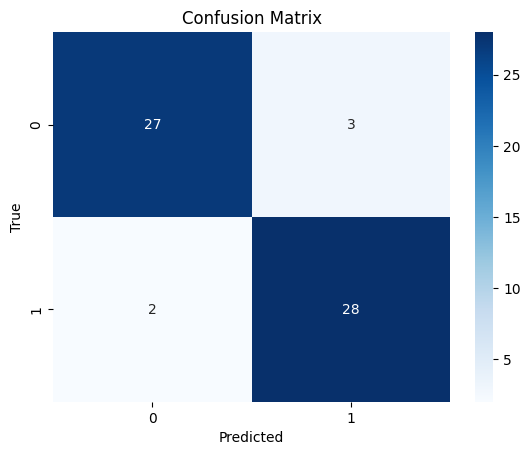

In [10]:
# Data Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/tmp/ipykernel_33/4192727804.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


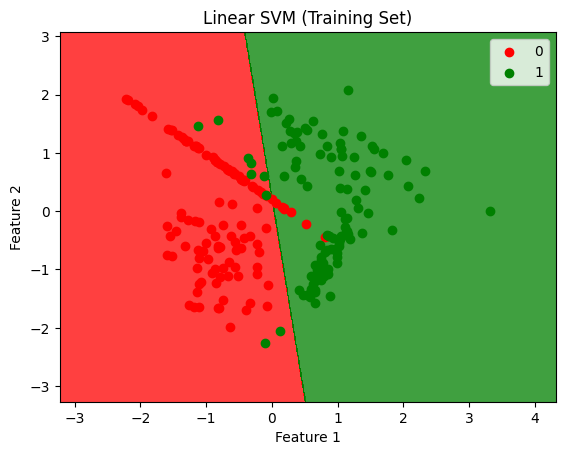

In [11]:
# Visualizing the training set results
def visualize_results(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, linear_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

visualize_results(X_train, y_train, 'Linear SVM (Training Set)')

/tmp/ipykernel_33/4192727804.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


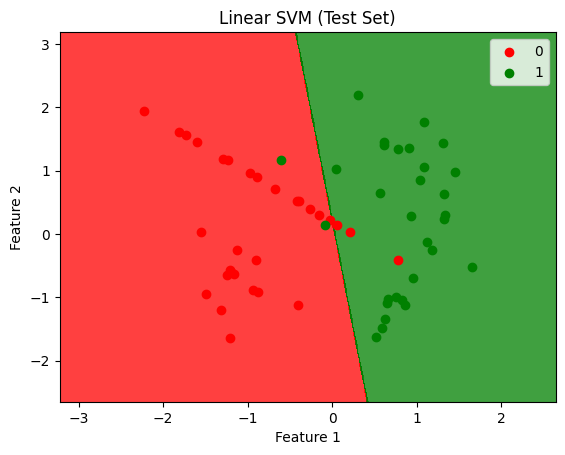

In [12]:
# Visualizing the test set results
visualize_results(X_test, y_test, 'Linear SVM (Test Set)')

## Non-linear SVM without kernel

### When kernel is Gaussian Kernel Radial Basis Function (RBF)

In [13]:
# Non-Linear SVM without Kernel
nonlinear_svm_rbf = svm.SVC(kernel='rbf', degree=3)  # Change the degree parameter for different non-linearities
nonlinear_svm_rbf.fit(X_train, y_train)
nonlinear_predictions_rbf = nonlinear_svm_rbf.predict(X_test)
nonlinear_accuracy_rbf = accuracy_score(y_test, nonlinear_predictions_rbf)
print("Non-Linear SVM Accuracy:", nonlinear_accuracy_rbf)

Non-Linear SVM Accuracy: 0.9666666666666667


In [14]:
# Creating the confusion matrix for Non-linear SVM
cm_non_linear_rbf = confusion_matrix(y_test, nonlinear_predictions_rbf)
cm_non_linear_rbf

array([[29,  1],
       [ 1, 29]])

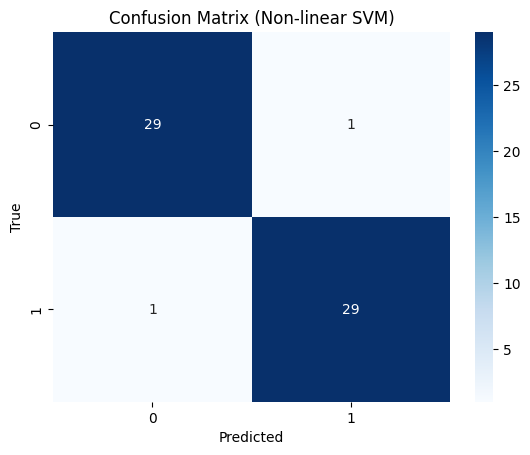

In [15]:
# Data Visualization for Non-linear SVM
sns.heatmap(cm_non_linear_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Non-linear SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### When kernel is sigmoid

In [16]:
# Non-Linear SVM without Kernel
nonlinear_svm_sigmoid = svm.SVC(kernel='sigmoid', degree=3)  # Change the degree parameter for different non-linearities
nonlinear_svm_sigmoid.fit(X_train, y_train)
nonlinear_predictions_sigmoid = nonlinear_svm_sigmoid.predict(X_test)
nonlinear_accuracy_sigmoid = accuracy_score(y_test, nonlinear_predictions_sigmoid)
print("Non-Linear SVM Accuracy:", nonlinear_accuracy_sigmoid)

Non-Linear SVM Accuracy: 0.8833333333333333


In [17]:
# Creating the confusion matrix for Non-linear SVM
cm_non_linear_sigmoid = confusion_matrix(y_test, nonlinear_predictions_sigmoid)
cm_non_linear_sigmoid

array([[26,  4],
       [ 3, 27]])

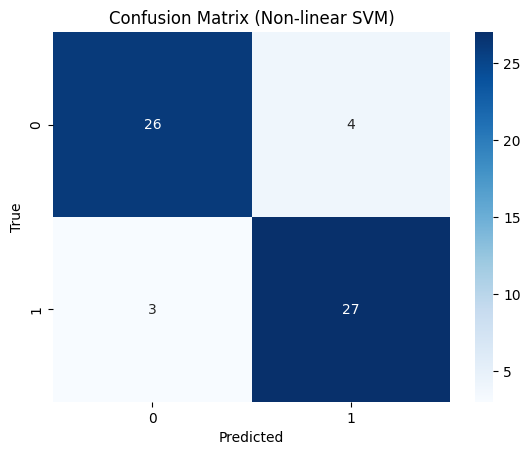

In [18]:
# Data Visualization for Non-linear SVM
sns.heatmap(cm_non_linear_sigmoid, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Non-linear SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### When kernel is polynomial

In [19]:
# Non-Linear SVM without Kernel
nonlinear_svm_poly = svm.SVC(kernel='poly', degree=3)  # Change the degree parameter for different non-linearities
nonlinear_svm_poly.fit(X_train, y_train)
nonlinear_predictions_poly = nonlinear_svm_poly.predict(X_test)
nonlinear_accuracy_poly = accuracy_score(y_test, nonlinear_predictions_poly)
print("Non-Linear SVM Accuracy:", nonlinear_accuracy_poly)

Non-Linear SVM Accuracy: 0.9333333333333333


In [20]:
# Creating the confusion matrix for Non-linear SVM
cm_non_linear_poly = confusion_matrix(y_test, nonlinear_predictions_poly)
cm_non_linear_poly

array([[29,  1],
       [ 3, 27]])

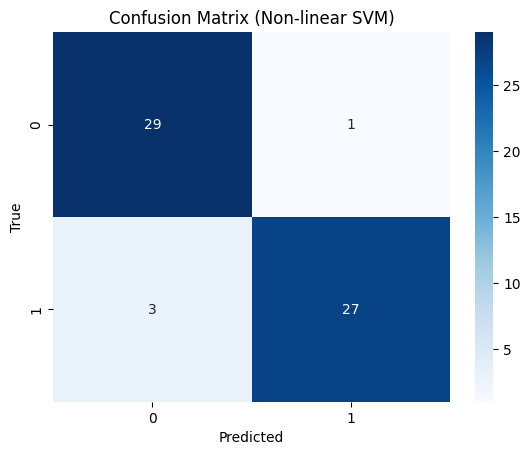

In [21]:
# Data Visualization for Non-linear SVM
sns.heatmap(cm_non_linear_poly, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Non-linear SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Visualization

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


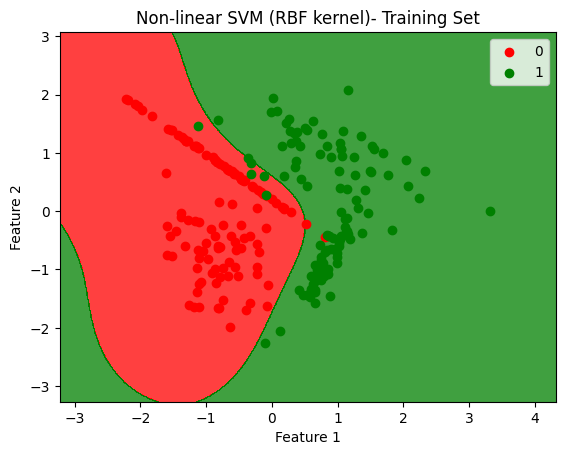

In [23]:
# Visualizing the training set results for Non-linear SVM
def visualize_results_non_linear(X_set, y_set, title,model_name):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model_name.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
# Visualizing the training set results for Non-linear SVM
visualize_results_non_linear(X_train, y_train, 'Non-linear SVM (RBF kernel)- Training Set',nonlinear_svm_rbf)

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


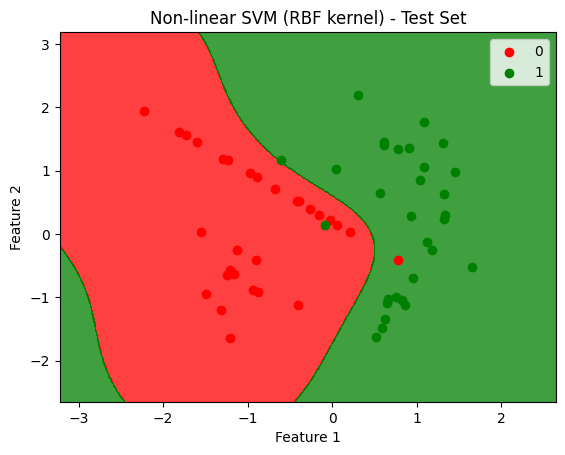

In [25]:
# Visualizing the test set results for Non-linear SVM
visualize_results_non_linear(X_test, y_test, 'Non-linear SVM (RBF kernel) - Test Set',nonlinear_svm_rbf)

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


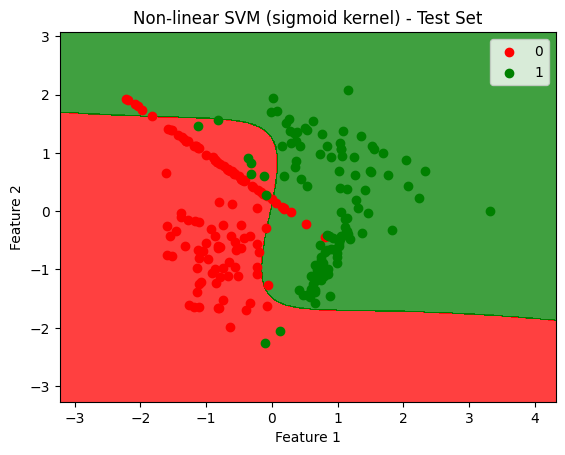

In [35]:
visualize_results_non_linear(X_train, y_train, 'Non-linear SVM (sigmoid kernel) - Test Set',nonlinear_svm_sigmoid)

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


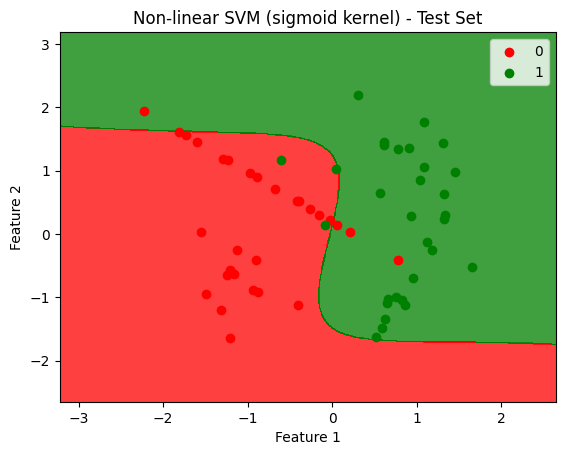

In [34]:
visualize_results_non_linear(X_test, y_test, 'Non-linear SVM (sigmoid kernel) - Test Set',nonlinear_svm_sigmoid)

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


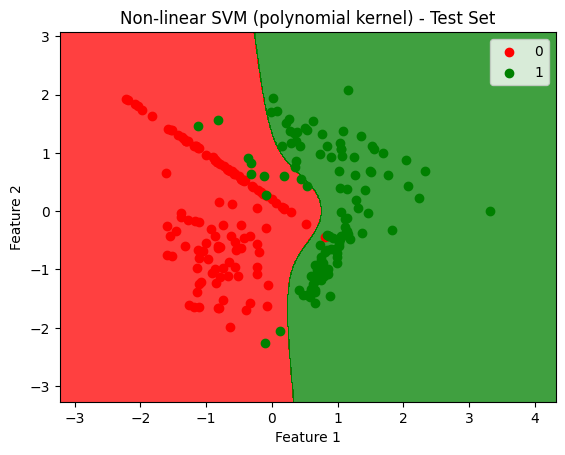

In [33]:
visualize_results_non_linear(X_train, y_train, 'Non-linear SVM (polynomial kernel) - Test Set',nonlinear_svm_poly)

/tmp/ipykernel_33/1688759761.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


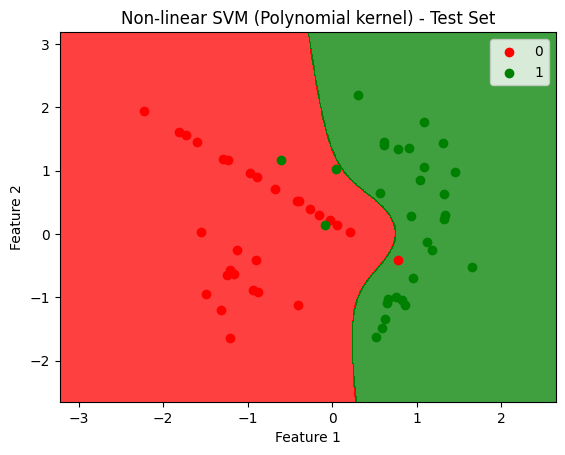

In [32]:
visualize_results_non_linear(X_test, y_test, 'Non-linear SVM (Polynomial kernel) - Test Set',nonlinear_svm_poly)

## SVM without using sklearn


In [126]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)



In [127]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Generate synthetic dataset
# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

In [130]:
prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])


Loss: 0.09791586674754517
Prediction: [-1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.]
Accuracy: 1.0
w, b: [array([[0.44208627, 0.14942691]]), 0.05300000000000003]


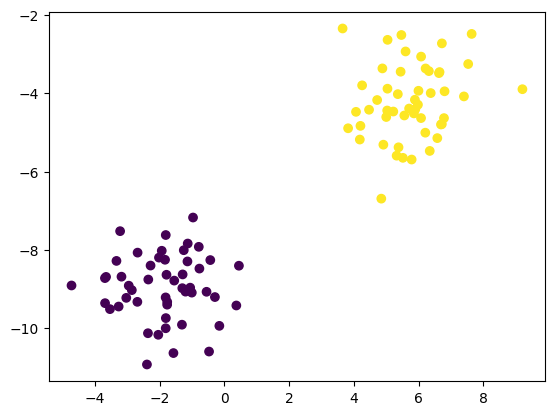

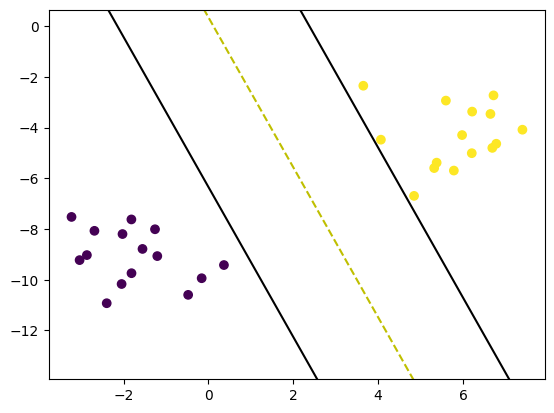

In [131]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

## Linear and non-linear SVM without using kernels


In [156]:
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_svm = SVC()
linear_svm.fit(X_train, y_train)
linear_svm_pred = linear_svm.predict(X_test)
linear_svm_accuracy = accuracy_score(y_test, linear_svm_pred)
print("Linear SVM Accuracy:", linear_svm_accuracy)

Linear SVM Accuracy: 0.8055555555555556


In [157]:
cm = confusion_matrix(y_test,linear_svm_pred)
cm

array([[14,  0,  0],
       [ 0, 11,  3],
       [ 0,  4,  4]])

In [158]:
print(classification_report(y_test,linear_svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



In [159]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [160]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[12  0  2]
 [ 2 12  0]
 [ 1  1  6]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.92      0.86      0.89        14
           2       0.75      0.75      0.75         8

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.84      0.83      0.83        36

